In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline

In [18]:
# Define the objective, its gradient, and the solvers

D = np.diag([2,50])

def f(x):
    return 1/2*np.linalg.norm(D @ x)**2

def df(x):
    return D @ x

def gd(df, x0, beta, T):
    xhist=[x0]
    for t in np.arange(1,T+1):
        prevx = xhist[-1]
        stepsize = 1/beta
        xhist.append(prevx - stepsize * df(prevx))
    return xhist

def heavyball(df, x0, gamma, beta, T):
    xhist=[x0]
    mu = 0*x0
    for t in np.arange(1, T+1):
        stepsize = 1/beta
        prevx = xhist[-1]
        mu = gamma* mu + stepsize * df(prevx)
        xhist.append(prevx - mu)
    return xhist

def nag(df, x0, gamma, beta, T):
    xhist=[x0]
    mu = 0*x0
    for t in np.arange(1, T+1):
        stepsize = 1/beta
        prevx = xhist[-1]
        mu = gamma* mu + stepsize * df(prevx - gamma*mu)
        xhist.append(prevx - mu)
    return xhist  

def adagrad(df, x0, alpha, T, eps=10**(-8)):
    xhist = [x0]
    d = np.zeros(len(x0)) + eps
    for t in np.arange(1, T+1):
        prevx = xhist[-1]
        prevgrad = df(prevx)
        print("prevgrad", prevgrad.shape, "d", d.shape)
        d = d + prevgrad * prevgrad
        xhist.append(prevx - alpha*prevgrad/np.sqrt(d))
    return xhist


## Method for YOGI implementation
def yogi(df, x0, b1, b2, a, T, eps=10**(-8)):
    xhist = [x0]
    m = 0
    v = 0
    for t in np.arange(1, T+1):
        eta = 1.0/(1.0+a*t)
        prevx = xhist[-1]
        prevgrad = df(prevx)
        m = b1*m + (1-b1)*prevgrad
        v = v - (1-b2)*np.sign(v-prevgrad**2)*(prevgrad**2)
        xhist.append(prevx - eta*m/(np.sqrt(v) + eps))
    return xhist

x0 = np.array([5,4])
gdxhist = gd(df, x0, beta=250, T=10)
gdxhist = np.array(gdxhist)

gamma = 0.9
hbxhist = heavyball(df, x0, gamma, beta=250, T=10)
hbxhist = np.array(hbxhist)

gamma = 0.9
nagxhist = nag(df, x0, gamma, beta=250, T=10)
nagxhist = np.array(nagxhist)

alpha = 2
agxhist = adagrad(df, x0, alpha, T=10)
agxhist = np.array(agxhist)

## Using provided parameters from the paper
b1 = 0.9
b2 = 0.999
ygxhist = yogi(df, x0, b1, b2, alpha, T=10)
ygxhist = np.array(ygxhist)

prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)
prevgrad (2,) d (2,)


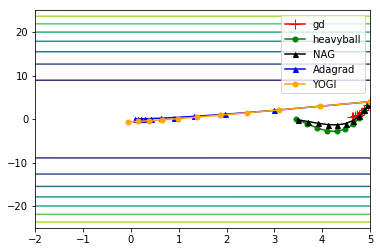

In [19]:
# Plot the contours of f and the history of the point estimates

xrange = np.linspace(-2,5)
yrange = np.linspace(-25,25)
X,Y = np.meshgrid(xrange, yrange)
Z = np.array([z for z in map(f, zip(X.flatten(), Y.flatten()))])
Z = Z.reshape(X.shape)
gdlines = mline.Line2D(gdxhist[:,0], gdxhist[:,1], color='red', marker='+', markersize=10, label="gd")
hblines = mline.Line2D(hbxhist[:,0], hbxhist[:,1], color='green', marker='o', markersize=5, label="heavyball")
naglines = mline.Line2D(nagxhist[:,0], nagxhist[:,1], color='black', marker='^', markersize=5, label="NAG")
aglines = mline.Line2D(agxhist[:,0], agxhist[:,1], color='blue', marker='^', markersize=5, label="Adagrad")
yglines = mline.Line2D(ygxhist[:,0], ygxhist[:,1], color='orange', marker='o', markersize=5, label="YOGI")

fig, ax = plt.subplots()
ax.contour(X,Y,Z)
transform = ax.transAxes
ax.add_line(gdlines)
ax.add_line(hblines)
ax.add_line(naglines)
ax.add_line(aglines)
ax.add_line(yglines)
ax.legend()
plt.show()

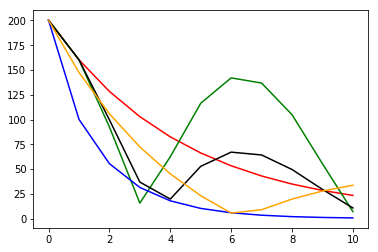

In [20]:
# Plot the size of the gradient vs iteration
gradnorm = lambda x: np.linalg.norm(df(x))
gdgradhist = np.apply_along_axis(gradnorm, 1, gdxhist)
hbgradhist = np.apply_along_axis(gradnorm, 1, hbxhist)
naggradhist = np.apply_along_axis(gradnorm, 1, nagxhist)
aggradhist = np.apply_along_axis(gradnorm, 1, agxhist)
yoggradhist = np.apply_along_axis(gradnorm, 1, ygxhist)

plt.plot(gdgradhist, color = 'red')
plt.plot(hbgradhist, color = 'green')
plt.plot(naggradhist, color='black')
plt.plot(aggradhist, color='blue')
plt.plot(yoggradhist, color='orange')

In [145]:
aggradhist

array([200.24984395, 100.17983829,  55.41901829,  31.39273998,
        17.91561246,  10.25413502,   5.87917536,   3.37647143,
         1.94327962,   1.12169899,   0.65009018])

In [146]:
gdgradhist

array([200.24984395, 160.30722504, 128.3777169 , 102.86425512,
        82.49037981,  66.23631358,  53.28780729,  42.99514823,
        34.84020617,  28.40976218,  23.373664  ])